In [1]:
import scanpy as sc
import sctk

sc.settings.set_figure_params(dpi=80)

In [ ]:
# this cell is tagged 'parameters' to use papermill
input_file = '/data/cephfs-1/work/projects/crc-patients-treatment-and-relapse/work/scRNA/raw_data/CE_SC_C_1/count/sample_filtered_feature_bc_matrix.h5'
output_dir = '/data/cephfs-1/work/groups/cubi/users/cemo10_c/scRNA/theislab_all_samples/preprocess_all_samples/CE_SC_C_1/'

In [ ]:
adata = sc.read_10x_h5(input_file)
adata

In [ ]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 9378 × 18082
    var: 'gene_ids', 'feature_types', 'genome'

In [3]:
sctk.calculate_qc(adata)
adata

AnnData object with n_obs × n_vars = 11622 × 18082
    obs: 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells'

In [4]:
sctk.cellwise_qc(adata)
adata

n_counts: [2575.524169921875, 119695.9609375], 10951/11622 passed
n_genes: [1486.58349609375, 9719.0009765625], 11088/11622 passed
percent_mito: [0.0, 5.186137676239014], 11250/11622 passed
percent_ribo: [0.0, 100.00000000000003], 11622/11622 passed


/data/cephfs-1/home/users/cemo10_c/work/miniconda/envs/sctk/lib/python3.9/site-packages/sctk/_pipeline.py:237: RuntimeWarning: divide by zero encountered in scalar divide
  return 5.0 / (xmax - xmin)
/data/cephfs-1/home/users/cemo10_c/work/miniconda/envs/sctk/lib/python3.9/site-packages/sctk/_pipeline.py:290: RuntimeWarning: invalid value encountered in multiply
  x_fit = (x_fit * f).reshape(-1, 1)


percent_hb: [0.0, 1.0], 11622/11622 passed
10638/11622 pass


AnnData object with n_obs × n_vars = 11622 × 18082
    obs: 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'cell_passed_qc'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells'
    uns: 'scautoqc_ranges'

In [5]:
adata.obs['cell_passed_qc'].sum()

np.int64(10638)

In [6]:
adata.uns['scautoqc_ranges']

,low,high
n_counts,2575.52417,119695.960938
n_genes,1486.583496,9719.000977
percent_mito,0.0,5.186138
percent_ribo,0.0,100.0
percent_hb,0.0,1.0


In [7]:
sctk.default_metric_params_df

,min,max,scale,side,min_pass_rate
n_counts,1000.00,NaN,log,min_only,0.10
n_genes,100.00,NaN,log,min_only,0.10
percent_mito,0.01,20.0,log,max_only,0.10
percent_ribo,0.00,100.0,log,both,0.10
percent_hb,NaN,1.0,log,max_only,0.10
percent_soup,NaN,5.0,log,max_only,0.10
percent_spliced,50.00,97.5,log,both,0.10
scrublet_score,NaN,0.3,linear,max_only,0.95


In [8]:
#present as columns in obs of the object
metrics_list = ["log1p_n_counts", "log1p_n_genes", "percent_mito", "percent_ribo"]
sctk.generate_qc_clusters(adata, metrics = metrics_list)
adata

/data/cephfs-1/home/users/cemo10_c/work/miniconda/envs/sctk/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/cephfs-1/home/users/cemo10_c/work/miniconda/envs/sctk/lib/python3.9/site-packages/sctk/_pipeline.py:201: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(aux_ad, resolution=res, key_added="qc_cluster")


AnnData object with n_obs × n_vars = 11622 × 18082
    obs: 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'cell_passed_qc', 'qc_cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells'
    uns: 'scautoqc_ranges'
    obsm: 'X_umap_qc'

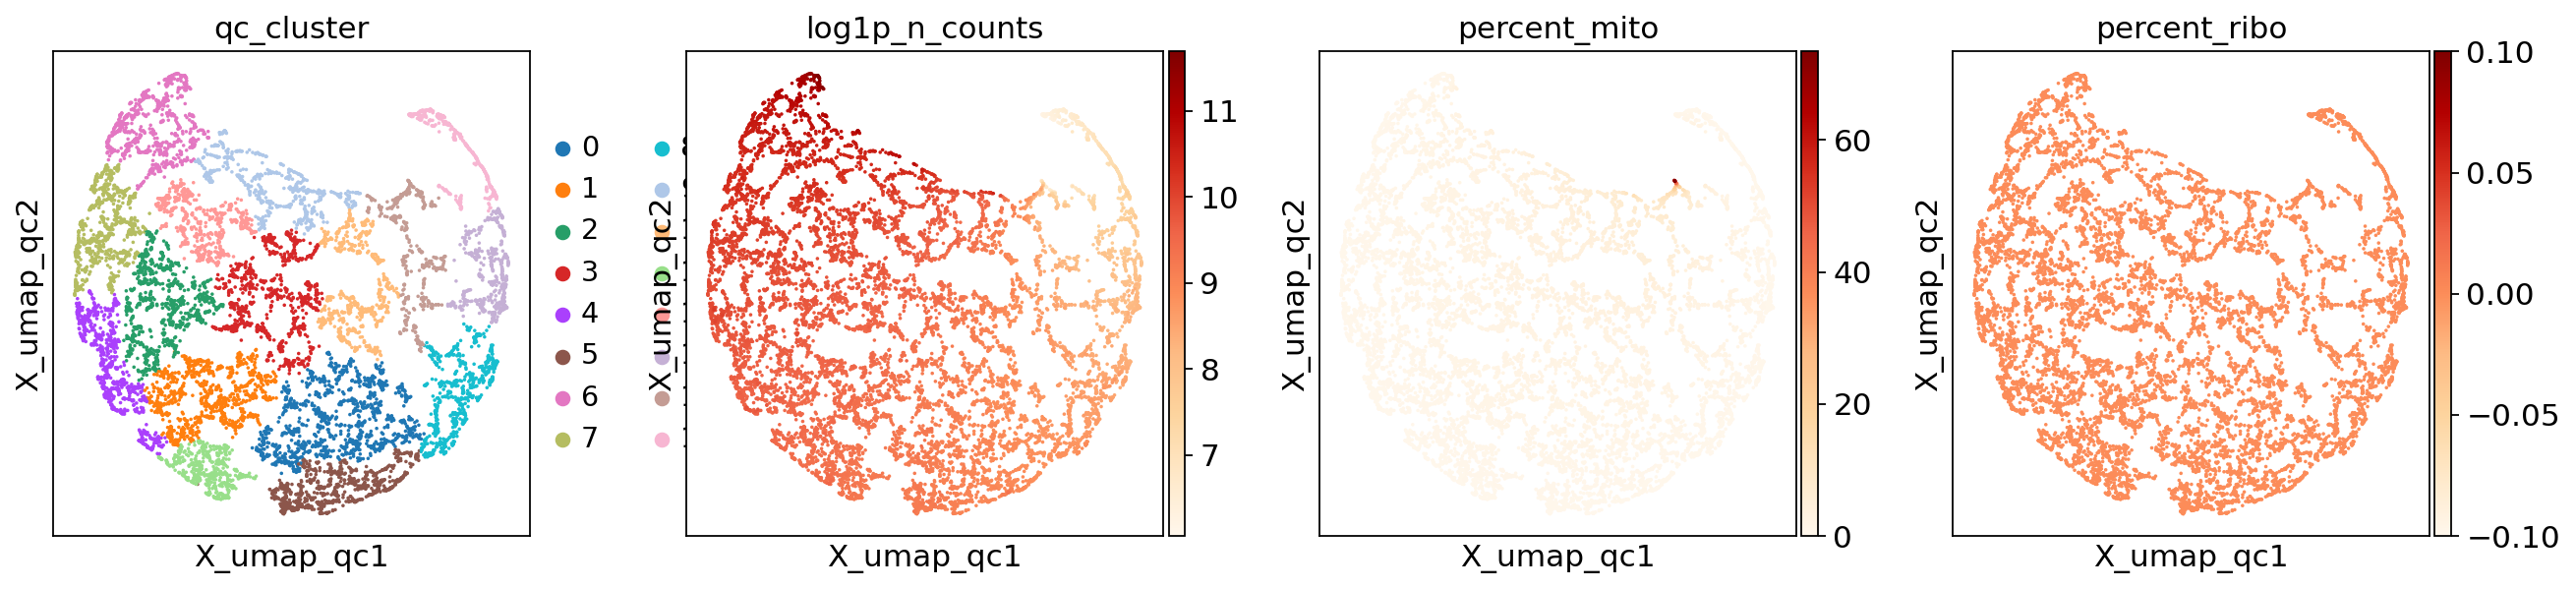

In [9]:
sc.pl.embedding(adata, "X_umap_qc", color=["qc_cluster", "log1p_n_counts", "percent_mito", "percent_ribo"], color_map="OrRd")

In [10]:
sctk.clusterwise_qc(adata)
adata

AnnData object with n_obs × n_vars = 11622 × 18082
    obs: 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'cell_passed_qc', 'qc_cluster', 'cluster_passed_qc'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells'
    uns: 'scautoqc_ranges', 'qc_cluster_colors'
    obsm: 'X_umap_qc'

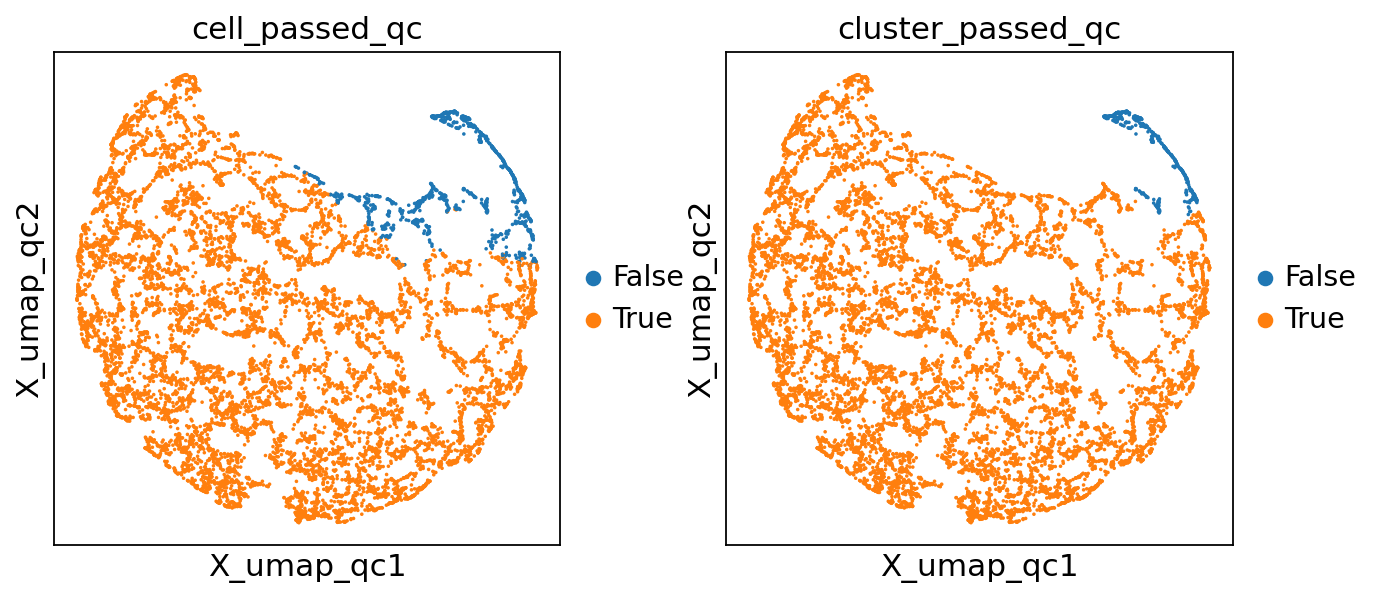

In [11]:
sc.pl.embedding(adata, "X_umap_qc", color=["cell_passed_qc", "cluster_passed_qc"])

Best overlap found for resolution 0.9


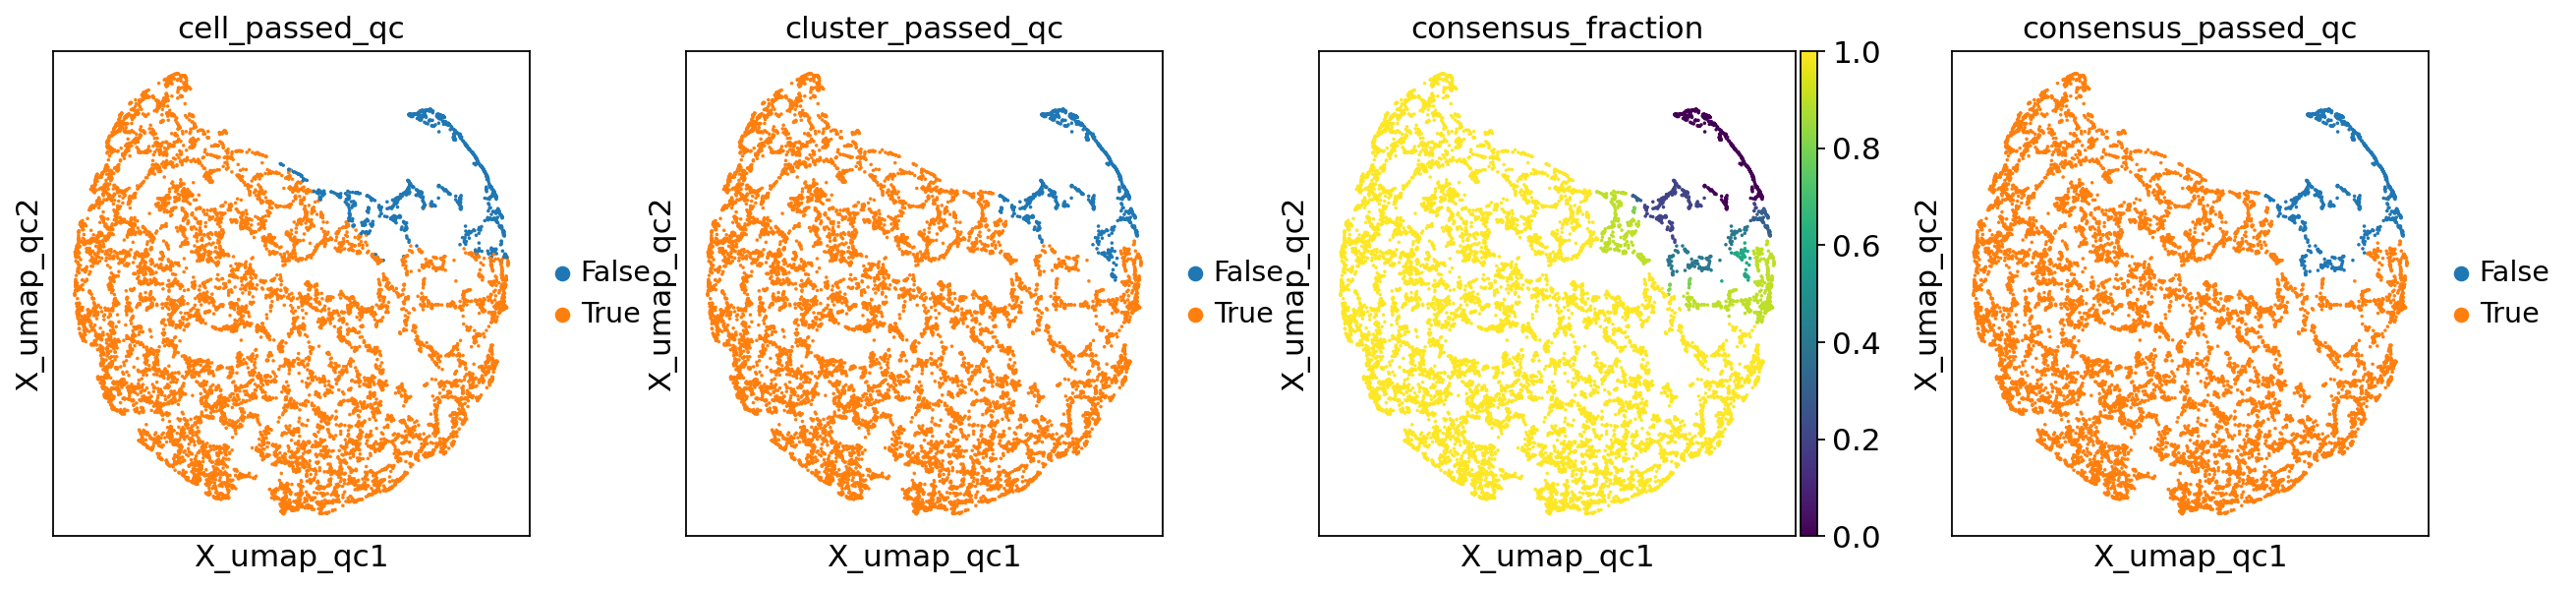

In [12]:
sctk.multi_resolution_cluster_qc(adata, metrics = metrics_list)
sc.pl.embedding(adata, "X_umap_qc", color=["cell_passed_qc",
                                           "cluster_passed_qc",
                                           "consensus_fraction",
                                           "consensus_passed_qc"])

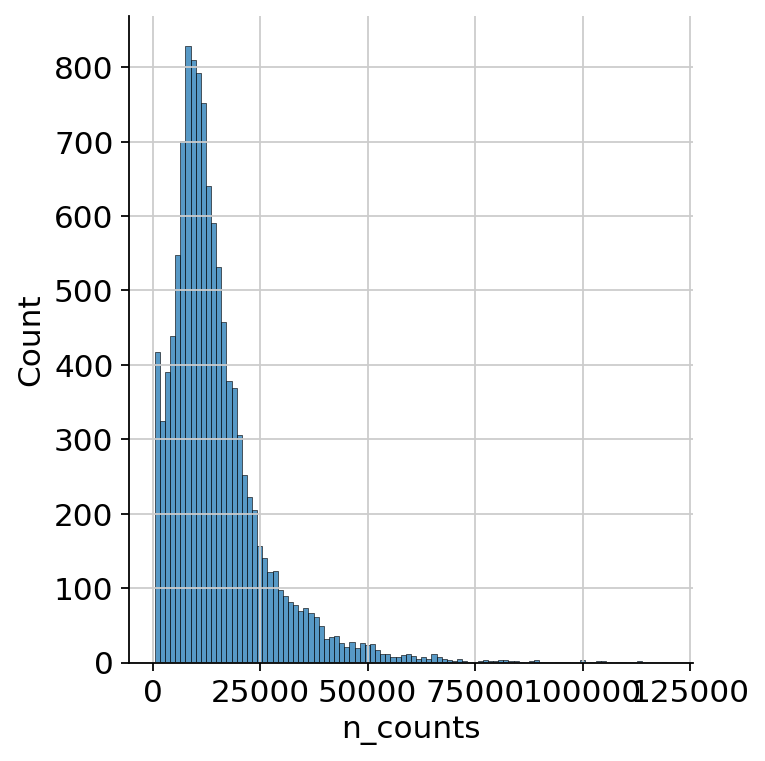

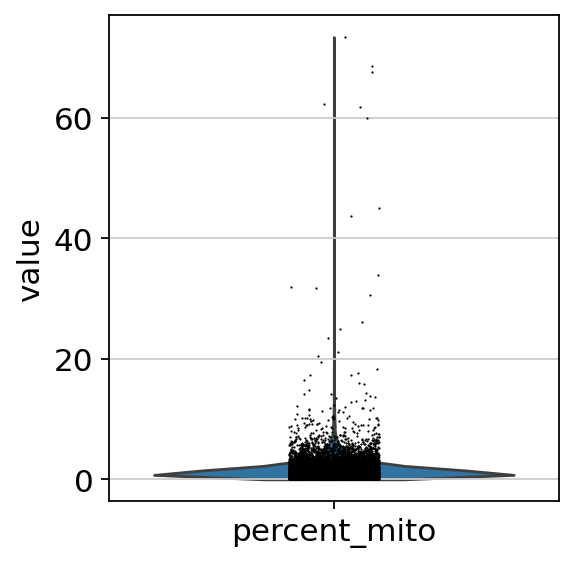

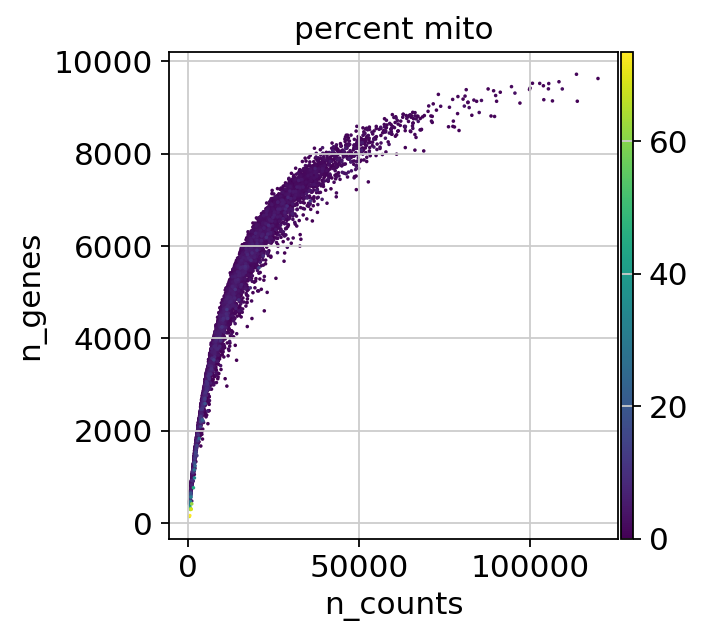

In [13]:
import seaborn as sns
p1 = sns.displot(adata.obs["n_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "percent_mito")
p3 = sc.pl.scatter(adata, "n_counts", "n_genes", color="percent_mito")

In [ ]:
import os
os.makedirs(output_dir, exist_ok=True)
adata.uns['scautoqc_ranges'] = adata.uns['scautoqc_ranges'].to_dict()
adata.write(output_dir + "scAutoQC.h5ad")

In [14]:
# filter out cells that did not pass qc
adata = adata[adata.obs['cell_passed_qc'], :]

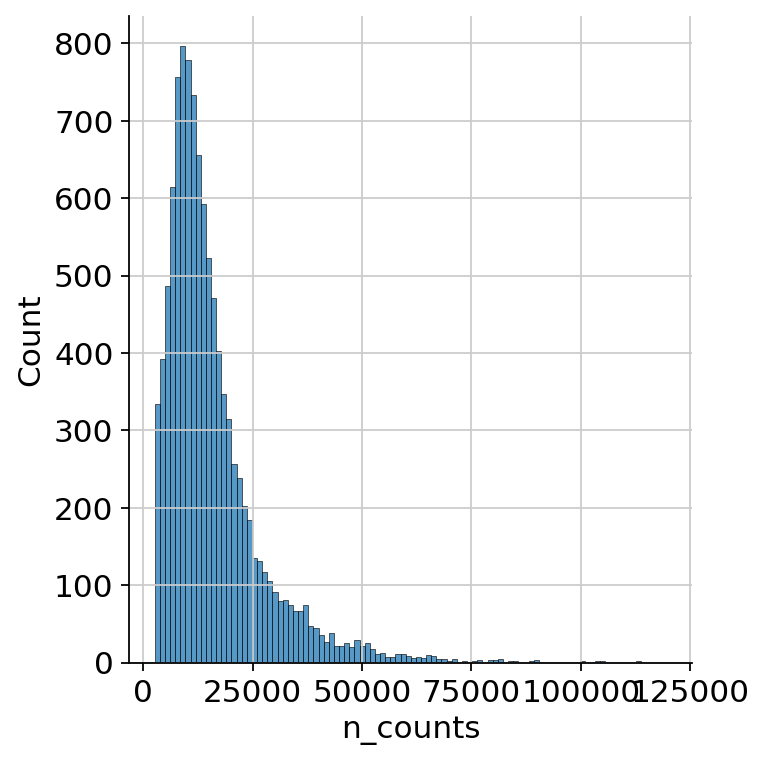

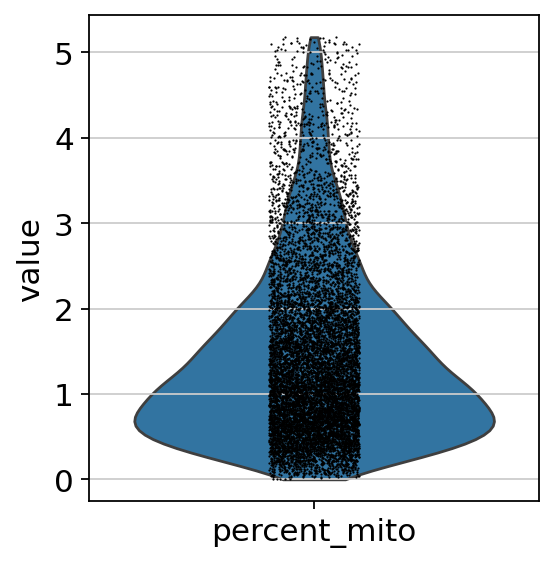

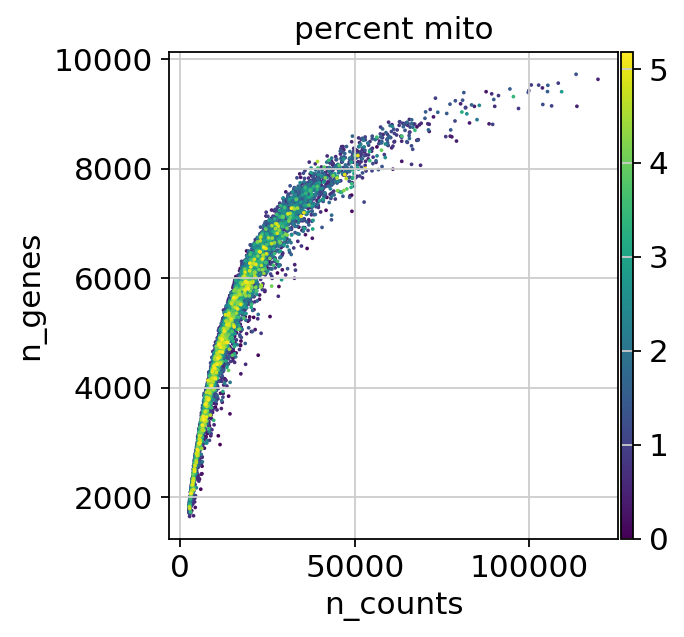

In [15]:
import seaborn as sns
p1 = sns.displot(adata.obs["n_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "percent_mito")
p3 = sc.pl.scatter(adata, "n_counts", "n_genes", color="percent_mito")